### Import Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

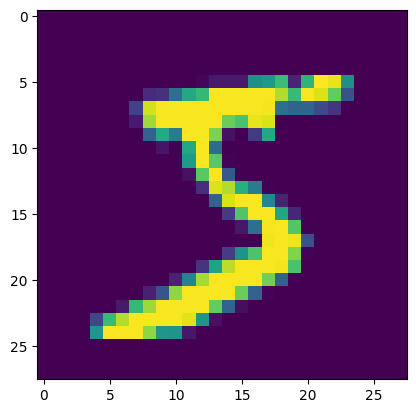

In [11]:
plt.imshow(X_train[0])
plt.show()

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
X_train[0].shape

(28, 28)

In [16]:
28*28

784

### 1) Encoding images

In [15]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [18]:
decoder = Sequential()
decoder.add(Dense(50, activation='relu', input_shape=[25]))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28, 28]))

In [19]:
autoencoder = Sequential([encoder, decoder])

In [21]:
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=1.5), metrics=['accuracy'])

In [22]:
autoencoder.fit(X_train, X_train, epochs=5, validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2525 - accuracy: 0.0867 - val_loss: 0.2145 - val_accuracy: 0.1179
Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1915 - accuracy: 0.1492 - val_loss: 0.1691 - val_accuracy: 0.1745
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1583 - accuracy: 0.1968 - val_loss: 0.1496 - val_accuracy: 0.2123
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1465 - accuracy: 0.2172 - val_loss: 0.1397 - val_accuracy: 0.2251
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1394 - accuracy: 0.2263 - val_loss: 0.1353 - val_accuracy: 0.2333


In [23]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 242ms/step


Original Image
(28, 28)


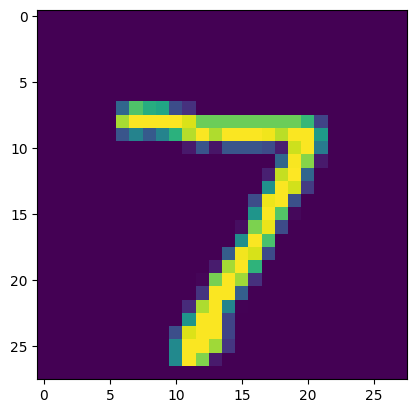

Reconstructed Image
(28, 28)


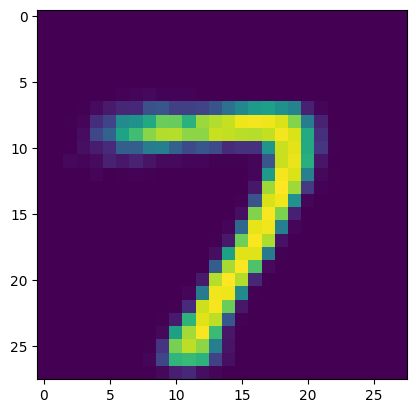

In [25]:
n = 0
print('Original Image')
print(X_test[n].shape)
plt.imshow(X_test[n])
plt.show()
print('Reconstructed Image')
print(passed_images[n].shape)
plt.imshow(passed_images[n])
plt.show()

### 2) Noise Removal

In [31]:
from tensorflow.keras.layers import GaussianNoise
import tensorflow as tf

In [27]:
sample = GaussianNoise(0.2)

In [28]:
noisy = sample(X_test[:10], training=True)

Original


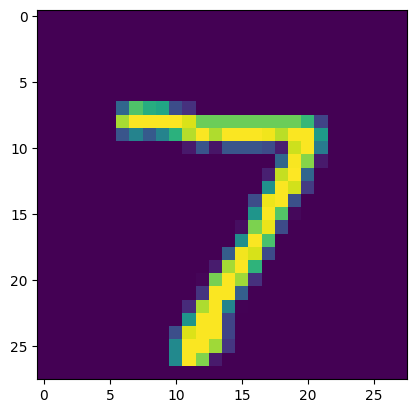

Noisy


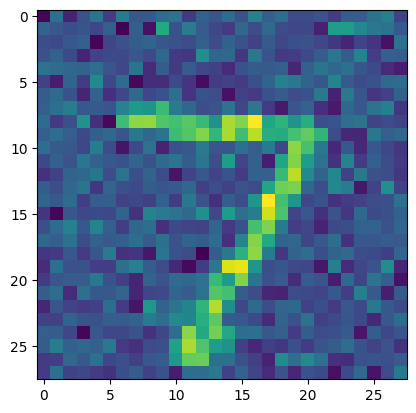

In [29]:
n = 0
print('Original')
plt.imshow(X_test[n])
plt.show()
print('Noisy')
plt.imshow(noisy[n])
plt.show()

In [32]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [33]:
decoder = Sequential()
decoder.add(Dense(50, activation='relu', input_shape=[25]))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28, 28]))

In [34]:
noise_remover = Sequential([encoder, decoder])

In [35]:
noise_remover.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=1.5), metrics=['accuracy'])

In [36]:
noise_remover.fit(X_train, X_train, epochs=8, validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 23s 11ms/step - loss: 0.2550 - accuracy: 0.0828 - val_loss: 0.2150 - val_accuracy: 0.1190
Epoch 2/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1871 - accuracy: 0.1522 - val_loss: 0.1721 - val_accuracy: 0.1836
Epoch 3/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1586 - accuracy: 0.1945 - val_loss: 0.1488 - val_accuracy: 0.2042
Epoch 4/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1493 - accuracy: 0.2089 - val_loss: 0.1433 - val_accuracy: 0.2136
Epoch 5/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1444 - accuracy: 0.2174 - val_loss: 0.1385 - val_accuracy: 0.2233
Epoch 6/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1408 - accuracy: 0.2231 - val_loss: 0.1386 - val_accuracy: 0.2297
Epoch 7/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1372 - accuracy: 0.2277 - val_loss: 0.1334 - val_ac

In [37]:
noisy_images = sample(X_test[:10], training=True)

In [39]:
denoised = noise_remover(noisy_images)

Original Image


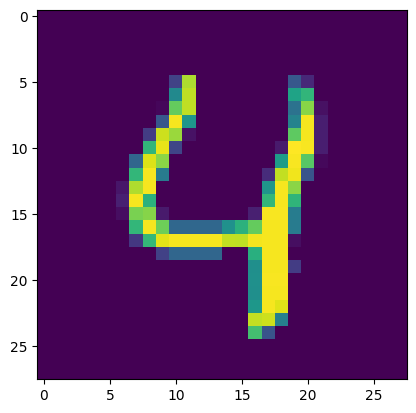

Noisy Image


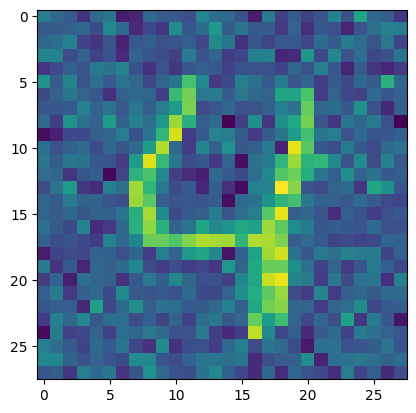

Denoised Image


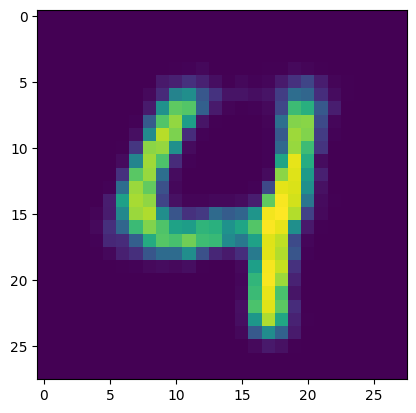

In [48]:
n = 4

print('Original Image')
plt.imshow(X_test[n])
plt.show()

print('Noisy Image')
plt.imshow(noisy_images[n])
plt.show()

print('Denoised Image')
plt.imshow(denoised[n])
plt.show()